# Impact of training set size

In this section, the evolution of the overall accuracy are first visually analysed. Then, statistical analyses are performed to determine the effect of the addition of training data on the model accuracy.

The results of this notebook are summarized in the Section IV-A of the paper.

In [1]:
import os

from lib.analysis.data_loading import load_reports
from lib.analysis.model import Model, Source, ActivityMetric, ModelMetric, Filter, TargetFilter
from lib.analysis.visualization import plot_comparison, plot_pairwise_comparision

MODELS = [Model.MLP, Model.CNN, Model.LSTM, Model.CNN_LSTM]
SOURCES = [Source.SP, Source.SW, Source.FUSED]
SOURCES_PRINT = {
    Source.SP: 'Smartphone',
    Source.SW: 'Smartwatch',
    Source.FUSED: 'Fused'
}
EVOLUTION_PLOT_TITLES = ['Smartphone', 'Smartwatch', 'Fused']
RESULTS_DIR = os.path.join('02_RESULTS', '01_TRAINING-SIZE', '{0}')

reports = load_reports()

## Visual inspection

Figure below shows the accuracy evolution regarding the increasing training set size in the **MLP**, **CNN**, **LSTM** and **CNN-LSTM** models, respectively. 

In every model, a clear tendency can be observed: the models trained with **smartphone** or **fused** data present a drastic increase of the model accuracy with low amounts of data, i.e., $n \leq 7$. On the other side, the models trained with **smartwatch** data have a smoother evolution.

Another tendency is observed with medium amounts of data, i.e., $8 \leq n \leq 12$: the evolution in all models and data sources tends to stabilize with very slight improvements in accuracy. In the case of the models trained with **smartphone** and the **fused** data, this stabilization threshold is around $n \in [10,11]$, while with the **smartwatch**-trained models the threshold is a bit lower, around $n \in [8,9]$.

It can also be observed that the models trained with the **smartwatch** data provide the most stable results, having the lowest SD and range, except in the MLP model, where the **smartphone** and **fused** data obtain better results. In general, the evolution tendency shown by the **smartphone** and the **fused** data is similar, although the **fused** data obtains slightly better results in all metrics.

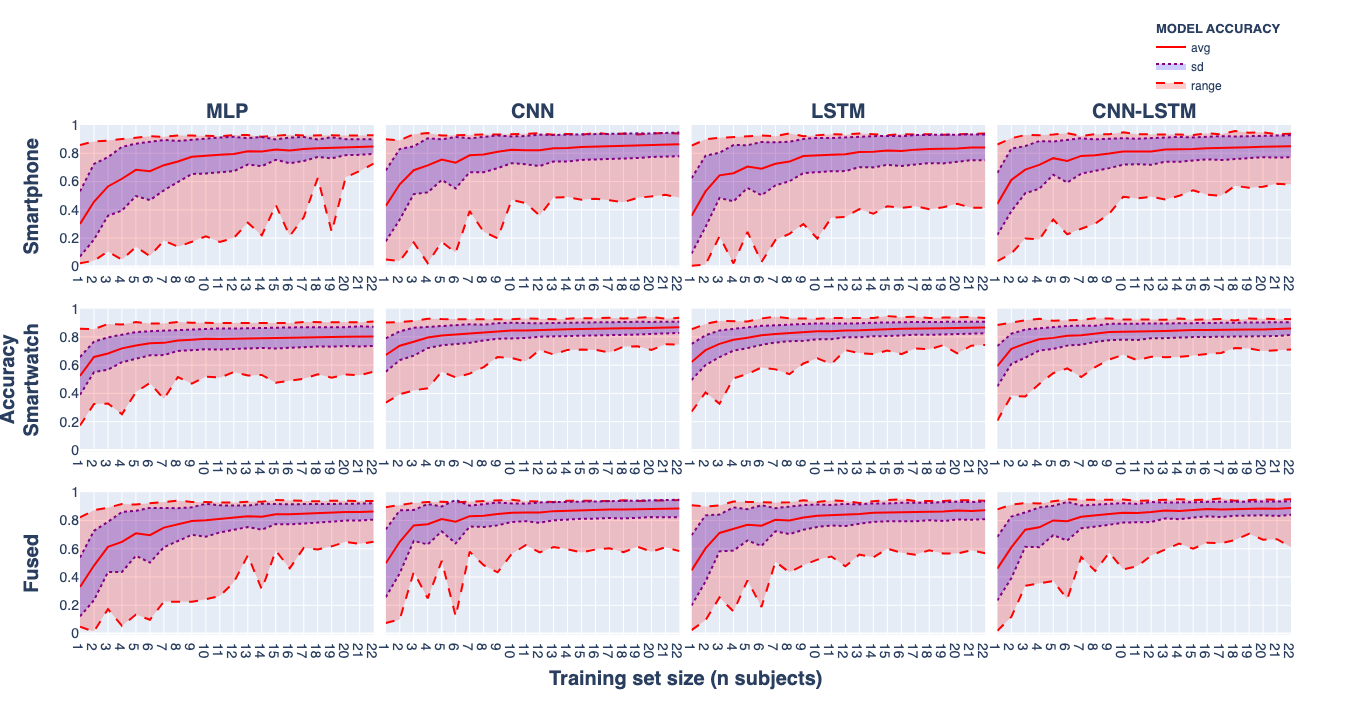

In [2]:
overall_evolution_fig = plot_comparison(
    reports, 
    MODELS,
    SOURCES, 
    Filter(None, None, TargetFilter.MODEL, ModelMetric.ACCURACY), 
    SOURCES_PRINT
)
overall_evolution_fig

In [3]:
overall_evolution_fig.write_image(RESULTS_DIR.format('01_overall-evolution.pdf'))

## Statistical analysis

Figure below depicts the statistical tests executed to determine the significance of the difference in accuracy caused by increasing training data in the MLP, CNN, LSTM and CNN-LSTM models respectively. In practice, the accuracy obtained from training models with $n_1$ subjects is compared with the accuracies obtained in models trained with $n_2$ subjects, where $n_2 > n_1$ (i.e., _does the accuracy statistically improve when training with more subjects?_).

> Prior to executing the statistical tests, the normality of the data was tested in order to use **parametric** or **non-parametric** tests. The results determined the **non-normality** of the data.

Overall, when the training data increases the accuracy increases too (with some isolated exceptions) in any model and data source, although this increase is not always significant. In every model and data source, improvements of the type $n_1 < n_2 + 1$ (i.e., adding the data of one subject more) start to be not significant around $n_1 \in [4,6]$.

Then, significant improvements seem to appear after 1) a certain threshold and 2) a specific amount of extra data (i.e., $n_1 < n_2 + x$). The first case is observed in the CNN and LSTM models. In both models, improvements are obtained when $n_1 \in [9,12]$ and $n_2 \in [13,14]$ across all data sources. In the MLP, there are improvements on $n_2 = 22$ when $n_1 \in [14,16]$ and $[17,18]$ with **smartwatch** and **fused** data, respectively; in the LSTM models, when $n_1 \in [14,16]$ improvements are observed when $n_2 = 20$ with any data source; and in the CNN-LSTM model, when $n_1 \in [16,18]$ improvements appear in $n_2 = 22$ with the **fused** data. 

Examples of the second case can be noticed in the CNN model with **smartphone** and  **smartwatch** data, where improvements to $n_1 \in [15, 17]$ and $n_1 \in [14,16]$, respectively, require the addition of data from $5$ subjects. The CNN-LSTM model also shows this behaviour with **smartphone** data, where improvements to $n_1 \in [9, 17]$ require the addition of data from $[3,5]$ subjects; the **smartwatch**, which requires data from $[4,6]$ subjects to obtain improvements when $n_1 \in [9,16]$; and with **fused** data, where improvements to $n_1 \in [9,13]$ are obtained after adding data from $2$ subjects.

Finally, no significant changes are observed after a certain range of values for $n_1$ is reached. In addition, these values seem constant across model architectures. For example, in models trained with **smartphone** data, no differences are observed after $n_1 \geq [17, 18]$. In the case of the **smartwatch** data, there are no improvements after $n_1 \geq 17$. These values are a bit higher for the models trained with **fused** data, around $n_1 \in [19,20]$.

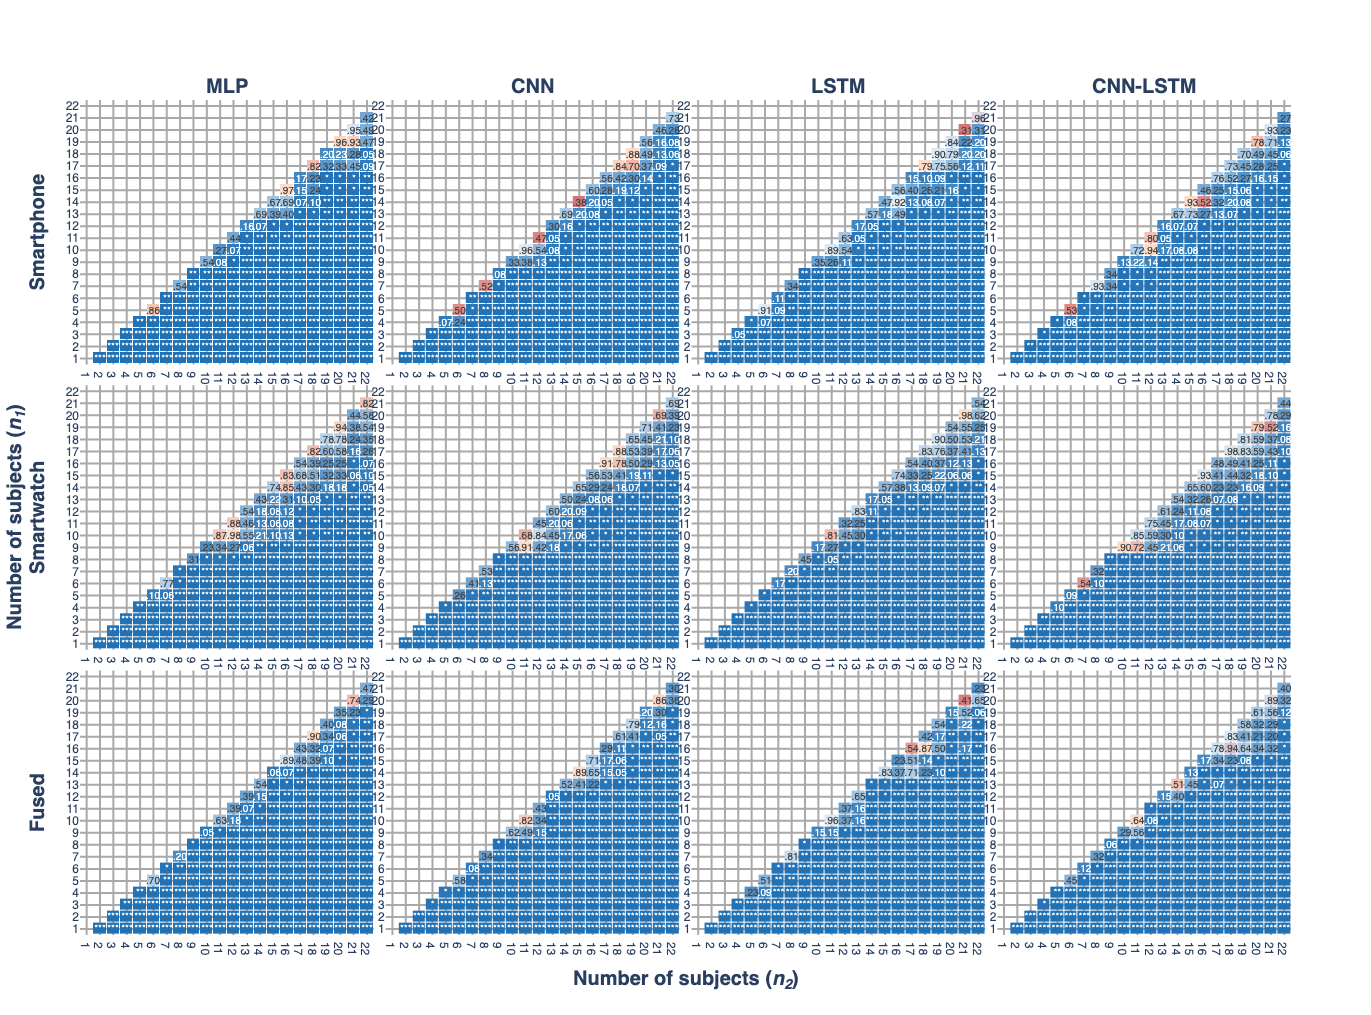

In [4]:
pairwise_comparison_fig = plot_pairwise_comparision(
    reports, 
    MODELS,
    SOURCES, 
    Filter(None, None, TargetFilter.MODEL, ModelMetric.ACCURACY), 
    SOURCES_PRINT, 
    stars=True, 
    parametric=False, 
    alternative='two-sided'
)
pairwise_comparison_fig

In [5]:
pairwise_comparison_fig.write_image(RESULTS_DIR.format('02_pairwise-comparison.pdf'))

## Summary

A first visual inspection clearly showed a fast evolution in the models' accuracy and activities F1-scores with a low amount of data going towards stabilization with higher amounts of data. In addition, this evolution was more abrupt for the models trained with **smartphone** and **fused** data since their initial performance was much lower than that of the **smartwatch**-trained models (i.e., they had more room for improvement). Moreover, a threshold was identified around $n \in [10,11]$ for **smartphone**- and **fused**-trained models, and $n \in [8,9]$ for **smartwatch**-trained models, in which the improvement speed of the models seemed to stabilize.

These insights were confirmed after the statistical analysis of the models' evolutions. We observed that with $n \in [4,6]$ the addition of data from one subject did not involve significant improvements. This lack of improvement was further deepened for $n \geq 9$, where the addition of several subjects' data was required for significant improvements.

We also identified that significant improvements after this threshold appear at a later threshold(s) or after the addition of specific amounts of data and that this behaviour depends on the data source and the model architecture. For instance, MLP showed improvements at $n=17$ with the **smartwatch** dataset and the LSTM at $n=14$ with the fused dataset, while the CNN and CNN-LSTM obtained improvements at certain thresholds or after the addition of the data from $5$ (CNN with **smartphone** or **smartwatch** datasets), $[4,6]$ (CNN-LSTM with **smartwatch** datasets), or $2$ (CNN-LSTM with **fused** dataset) subjects. 

Finally, no significant improvements were consistently found across model architectures after using $n \in [17,18]$ for **smarphone**-trained models, $n = 17$ for **smartwatch**-trained models and $n \in [19,20]$ for **fused**-trained models. However, this lack of improvement is probably caused by the limited amount of data, i.e., $n = 22$.

In summary, the results have shown that the models improve fast when the available data is limited, but tend to stabilize with higher amounts of data. Among the selected models, the improvement on the MLP and the LSTM seems to be conditioned by reaching certain thresholds, while the CNN and CNN-LSTM can be constantly improved by the addition of specific amounts of data. Among the data sources, the **smartwatch**-trained models present a good performance from low amounts of data but show a slower evolution than the **smartphone**- and **fused**-trained models. In addition, with high amounts of data, the **fused**-trained models seem to require a smaller amount of data to keep improving.